In [1]:
pwd()
using Pkg; Pkg.activate("../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`


18-element Vector{String}:
 ".ipynb_checkpoints"
 "README.md"
 "cis_sa_density_mat.npy"
 "clustering.ipynb"
 "density_mat.npy"
 "geometry_1.xyz"
 "integrals_h0.npz"
 "integrals_h1.npz"
 "integrals_h2.npz"
 "integrals_single_precision.npz"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "orbitals.molden"
 "overlap_mat.npy"
 "rhf.out"
 "rhf.py"
 "scf.ipynb"
 "tet-4mer-rhf.py"

In [2]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);



In [101]:
#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npz")["a"], 
    npzread("integrals_h1.npz")["a"], 
    npzread("integrals_h2.npz")["a"] 
);
Crhf = npzread("rhf_mo_coeffs.npy")
Cact = npzread("mo_coeffs_act.npy")
Cdoc = npzread("mo_coeffs_doc.npy")
S = npzread("overlap_mat.npy");
D = npzread("density_mat.npy");
D_state_avg = npzread("cis_sa_density_mat.npy");
sqrtS = sqrt(S)
invsqrtS = inv(sqrt(S))

n1 = tr(D_state_avg * S )
n2 = tr(D * S)
n3 = tr(inv(sqrt(S))'*D_state_avg*inv(sqrt(S)))
n3 = tr(D_state_avg*S*Cact*Cact'*S)
n3 = tr(Crhf' * D * Crhf)
n3 = tr(D)
@printf(" %12.8f %12.8f %12.8f\n", n1, n2, n3)

println(maximum(invsqrtS-invsqrtS'))

thresh=.0003

act_list = []
D_evals, D_evecs = eigen(sqrt(S)*D_state_avg*sqrt(S))
# D_evals, D_evecs = eigen( inv(sqrt(S))'*D_state_avg*inv(sqrt(S)))
# D_evals, D_evecs = eigen(S)
for (idx, n) in enumerate(D_evals)
    # @printf(" %4i = %12.8f", idx, n)
    if n < 2.0 - thresh
        if n > thresh
            @printf(" %4i = %12.8f", idx, n)
            println(" Active")
            push!(act_list, idx)
        else
            # println(" Virt")
        end
    else
        # println(" DOcc")
    end
end
D_evecs = inv(sqrt(S))*D_evecs[:,act_list]


 480.00000000 480.00000000 302.71260096
2.5757174171303632e-14
  829 =   0.00048039 Active
  830 =   0.00048460 Active
  831 =   0.00048820 Active
  832 =   0.00049475 Active
  833 =   0.00055904 Active
  834 =   0.00056509 Active
  835 =   0.00057207 Active
  836 =   0.00057785 Active
  837 =   0.00110837 Active
  838 =   0.00112263 Active
  839 =   0.00114879 Active
  840 =   0.00116722 Active
  841 =   0.00237641 Active
  842 =   0.00250101 Active
  843 =   0.00254004 Active
  844 =   0.00261761 Active
  845 =   0.00287271 Active
  846 =   0.00293945 Active
  847 =   0.00301331 Active
  848 =   0.00309984 Active
  849 =   0.00336225 Active
  850 =   0.00338625 Active
  851 =   0.00355949 Active
  852 =   0.00364930 Active
  853 =   0.00759830 Active
  854 =   0.00832496 Active
  855 =   0.00876434 Active
  856 =   0.00903386 Active
  857 =   0.01007632 Active
  858 =   0.01060765 Active
  859 =   0.01133518 Active
  860 =   0.01164831 Active
  861 =   0.13284646 Active
  862 =   0.1

 Laplacian Eigenvalues
    1   0.00000000
    2   0.13146136
    3   0.19888135
    4   0.25338742
    5   0.53486388
    6   0.56226787
    7   0.59069789
    8   0.62323115
    9   0.72133549
   10   0.75825325
   11   0.77441450
   12   0.79054185
   13   0.80143467
   14   0.81899258
   15   0.83062677
   16   0.84633365
   17   0.84870108
   18   0.85548451
   19   0.86667805
   20   0.87760446
   21   0.91917238
   22   0.92745317
   23   0.95096533
   24   0.97990048
   25   0.98951815
   26   0.99490705
   27   1.01028349
   28   1.01394750
   29   1.02563022
   30   1.04678446
   31   1.04965913
   32   1.05412708
   33   1.06131531
   34   1.07801951
   35   1.08126506
   36   1.08943823
   37   1.09337655
   38   1.09445474
   39   1.09823615
   40   1.11183438
   41   1.11688588
   42   1.12131647
   43   1.12673277
   44   1.13479619
   45   1.13915151
   46   1.14274899
   47   1.14821809
   48   1.16352237
   49   1.17249666
   50   1.18526815
   51   1.18667188
   52   

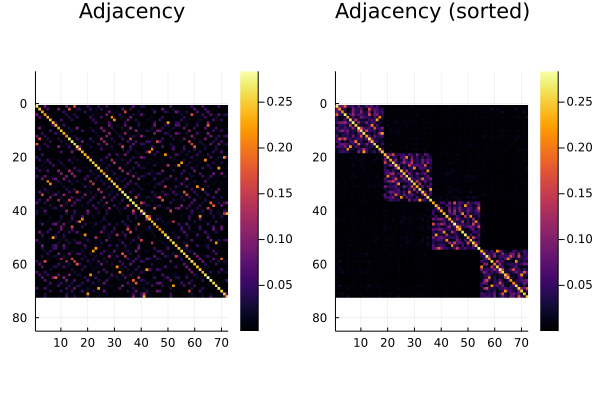

In [102]:
using LinearAlgebra, Printf
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    # println(clustering)
    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(sort(clustering))
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end

n_clusters = 4
adjacency = abs.(Cact'*D*Cact)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 

ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];
C_sorted = Cact[:,perm]
FermiCG.pyscf_write_molden(mol, C_sorted, filename="orbitals.molden");
FermiCG.pyscf_write_molden(mol, D_evecs, filename="orbitals2.molden");

plot(p1, p2, layout = @layout [a b])


In [103]:
# define clusters
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]
init_fspace = [ (1,1) for i in 1:n_clusters]
display(clusters)


4-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
 Cluster(2, [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
 Cluster(3, [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
 Cluster(4, [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72])

# Sub-divide Chromophores
Each chromophore now has 18 orbitals, which is too large for exact. Let's break each cluster up into 3 smaller 6 orbital clusters.
We will do this by block diagonalizing the fock matrix

In [112]:
ntot = 0
Cnew = zeros(size(C_sorted))
shift = 1

rdm1 = C_sorted' * S * D * S * C_sorted

new_clusters = Vector{Cluster}()
new_init_fspace = Vector{Tuple{Int,Int}}()

for ci in clusters
    # F = FermiCG.form_1rdm_dressed_ints(ints, ci.orb_list, rdm1, rdm1)
    # den1 = C'*D_state_avg*C*2
    # den1 = den1[ci.orb_list, ci.orb_list]
    # d1_evals, d1_evecs = eigen(F.h1);
    d1_evals, d1_evecs = eigen(rdm1[ci.orb_list, ci.orb_list]);
    # display(clusters[1].orb_list)
    # display(d1_evals)
    
    perm = reverse(sortperm(d1_evals, by=abs))
    d1_evals = d1_evals[perm]
    d1_evecs = d1_evecs[:,perm]

    for (i_idx, i) in enumerate(d1_evals)
        @printf(" %5i %12.8f\n", i_idx, i)
    end

    # define new smaller clusters
    push!(new_clusters, Cluster((ci.idx-1)*3+1, collect(shift:shift+5)))
    push!(new_clusters, Cluster((ci.idx-1)*3+2, collect(shift+6:shift+11)))
    push!(new_clusters, Cluster((ci.idx-1)*3+3, collect(shift+12:shift+17)))

    push!(new_init_fspace, (6,6))
    push!(new_init_fspace, (3,3))
    push!(new_init_fspace, (0,0))

    
    @printf(" RAS1: %12.8f\n",sum(d1_evals[1:6]))
    @printf(" RAS2: %12.8f\n",sum(d1_evals[7:12]))
    @printf(" RAS3: %12.8f\n",sum(d1_evals[13:18]))

    ntot += sum(d1_evals)
    # Cnew[:,shift:shift+length(ci)-1] .= C[:,ci.orb_list]
    Cnew[:,shift:shift+length(ci)-1] .= C_sorted[:,ci.orb_list]*d1_evecs
    shift += length(ci)
end
println(ntot)

FermiCG.pyscf_write_molden(mol, Cnew, filename="orbitals.molden");
    
display(new_clusters)
display(new_init_fspace)

# d1_evals, d1_evecs = eigen(Cact'*D*Cact*2);
# for (i_idx, i) in enumerate(d1_evals)
#     @printf(" %5i %12.8f\n", i_idx, i)
# end
# display(sum(d1_evals))

# @printf(" First: %12.8f\n",sum(d1_evals[1:32]))
# @printf(" Last : %12.8f\n",sum(d1_evals[33:72]))

# plot(d1_evals)

12-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6])
 Cluster(2, [7, 8, 9, 10, 11, 12])
 Cluster(3, [13, 14, 15, 16, 17, 18])
 Cluster(4, [19, 20, 21, 22, 23, 24])
 Cluster(5, [25, 26, 27, 28, 29, 30])
 Cluster(6, [31, 32, 33, 34, 35, 36])
 Cluster(7, [37, 38, 39, 40, 41, 42])
 Cluster(8, [43, 44, 45, 46, 47, 48])
 Cluster(9, [49, 50, 51, 52, 53, 54])
 Cluster(10, [55, 56, 57, 58, 59, 60])
 Cluster(11, [61, 62, 63, 64, 65, 66])
 Cluster(12, [67, 68, 69, 70, 71, 72])

12-element Vector{Tuple{Int64, Int64}}:
 (6, 6)
 (3, 3)
 (0, 0)
 (6, 6)
 (3, 3)
 (0, 0)
 (6, 6)
 (3, 3)
 (0, 0)
 (6, 6)
 (3, 3)
 (0, 0)

     1   1.99993419
     2   1.99989583
     3   1.99970858
     4   1.99968494
     5   1.99937766
     6   1.99924528
     7   1.99907952
     8   1.99896174
     9   1.99692589
    10   0.00322761
    11   0.00142754
    12   0.00125274
    13   0.00109329
    14   0.00102868
    15   0.00012605
    16   0.00002561
    17   0.00000735
    18   0.00000695
 RAS1:  11.99784648
 RAS2:   6.00087504
 RAS3:   0.00228793
     1   1.99995139
     2   1.99991910
     3   1.99984703
     4   1.99957577
     5   1.99902710
     6   1.99898561
     7   1.99886665
     8   1.99871196
     9   1.99605896
    10   0.00318420
    11   0.00136903
    12   0.00102323
    13   0.00095692
    14   0.00076934
    15   0.00020125
    16   0.00018389
    17   0.00013740
    18   0.00007864
 RAS1:  11.99730600
 RAS2:   5.99921404
 RAS3:   0.00232744
     1   1.99999866
     2   1.99997326
     3   1.99996928
     4   1.99992828
     5   1.99983922
     6   1.99920781
     7   1.99890269
     8   1.99875642


# CMF

In [113]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints_sorted, new_clusters, new_init_fspace, rdm1, rdm1,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="bfgs");


 ooCMF Iter:    1 Total= -2739.288475859782 Active= -266.701802446182 G=     3.60e+00
 ooCMF Iter:    2 Total= -2748.548871414948 Active= -275.962198001348 G=     3.27e+00
 ooCMF Iter:    3 Total= -2750.467369642065 Active= -277.880696228465 G=     3.21e+00
 ooCMF Iter:    4 Total= -2751.811419962863 Active= -279.224746549263 G=     2.93e+00
 ooCMF Iter:    5 Total= -2753.630278536039 Active= -281.043605122440 G=     1.46e+00
 ooCMF Iter:    6 Total= -2754.105592220430 Active= -281.518918806830 G=     9.63e-01
 ooCMF Iter:    7 Total= -2754.313921143766 Active= -281.727247730166 G=     7.68e-01
 ooCMF Iter:    8 Total= -2754.419896200296 Active= -281.833222786696 G=     5.88e-01
 ooCMF Iter:    9 Total= -2754.483386055862 Active= -281.896712642263 G=     3.44e-01
 ooCMF Iter:   10 Total= -2754.503746959769 Active= -281.917073546169 G=     2.01e-01
 ooCMF Iter:   11 Total= -2754.510285379396 Active= -281.923611965796 G=     1.27e-01
 ooCMF Iter:   12 Total= -2754.513385403925 Active= -2

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.754586e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 5.31e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.54e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.87e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.80e-07 ≰ 0.0e+00
    |g(x)|                 = 4.65e-02 ≰ 1.0e-06

 * Work counters
    Seconds run:   2148  (vs limit Inf)
    Iterations:    50
    f(x) calls:    163
    ∇f(x) calls:   163


 ooCMF Iter:   51 Total= -2754.585518245121 Active= -281.998844831522 G=     2.05e-01
*ooCMF -2754.58551825 


In [116]:
# FermiCG.pyscf_write_molden(mol,C_cmf,filename="benzene_10mer_cmf.molden");
ints_cmf = FermiCG.orbital_rotation(ints_sorted,U);
e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints_cmf, new_clusters, new_init_fspace, Da, Db,
                                        max_iter_oo=30, verbose=0, gconv=1e-6, method="bfgs");


 ooCMF Iter:    1 Total= -2754.585518245121 Active= -281.998844831522 G=     2.05e-01
 ooCMF Iter:    2 Total= -2754.595497584728 Active= -282.008824171128 G=     7.68e-02
 ooCMF Iter:    3 Total= -2754.597351016958 Active= -282.010677603358 G=     5.74e-02
 ooCMF Iter:    4 Total= -2754.599570904319 Active= -282.012897490719 G=     8.44e-02
 ooCMF Iter:    5 Total= -2754.605796679212 Active= -282.019123265613 G=     1.31e-01
 ooCMF Iter:    6 Total= -2754.615346387704 Active= -282.028672974105 G=     1.34e-01
 ooCMF Iter:    7 Total= -2754.621456913937 Active= -282.034783500337 G=     9.38e-02
 ooCMF Iter:    8 Total= -2754.624672738352 Active= -282.037999324752 G=     7.76e-02
 ooCMF Iter:    9 Total= -2754.627392835534 Active= -282.040719421935 G=     8.47e-02
 ooCMF Iter:   10 Total= -2754.631591070851 Active= -282.044917657251 G=     1.17e-01
 ooCMF Iter:   11 Total= -2754.636984368483 Active= -282.050310954883 G=     1.15e-01
 ooCMF Iter:   12 Total= -2754.640461814762 Active= -2

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.754667e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.13e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.55e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.19e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.33e-07 ≰ 0.0e+00
    |g(x)|                 = 3.91e-02 ≰ 1.0e-06

 * Work counters
    Seconds run:   858  (vs limit Inf)
    Iterations:    30
    f(x) calls:    65
    ∇f(x) calls:   65


 ooCMF Iter:   31 Total= -2754.666621545486 Active= -282.079948131886 G=     2.09e-01
*ooCMF -2754.66662155 


In [117]:
# FermiCG.pyscf_write_molden(mol,C_cmf,filename="benzene_10mer_cmf.molden");
ints_cmf = FermiCG.orbital_rotation(ints_cmf,U);
e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints_cmf, new_clusters, new_init_fspace, Da, Db,
                                        max_iter_oo=30, verbose=0, gconv=1e-6, method="bfgs");

 ooCMF Iter:    1 Total= -2754.666621545486 Active= -282.079948131886 G=     2.09e-01
 ooCMF Iter:    2 Total= -2754.676282298018 Active= -282.089608884418 G=     7.12e-02
 ooCMF Iter:    3 Total= -2754.677511363427 Active= -282.090837949827 G=     3.36e-02
 ooCMF Iter:    4 Total= -2754.677922381617 Active= -282.091248968018 G=     2.75e-02
 ooCMF Iter:    5 Total= -2754.678386250223 Active= -282.091712836624 G=     3.52e-02
 ooCMF Iter:    6 Total= -2754.679324591814 Active= -282.092651178215 G=     5.09e-02
 ooCMF Iter:    7 Total= -2754.680611545902 Active= -282.093938132302 G=     4.69e-02
 ooCMF Iter:    8 Total= -2754.681356633517 Active= -282.094683219917 G=     2.63e-02
 ooCMF Iter:    9 Total= -2754.681596184823 Active= -282.094922771224 G=     1.85e-02
 ooCMF Iter:   10 Total= -2754.681763055060 Active= -282.095089641460 G=     1.78e-02
 ooCMF Iter:   11 Total= -2754.681943414669 Active= -282.095270001069 G=     1.94e-02
 ooCMF Iter:   12 Total= -2754.682166564541 Active= -2

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.754684e+03

 * Found with
    Algorithm:     Conjugate Gradient

 * Convergence measures
    |x - x'|               = 1.25e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.76e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.00e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.90e-08 ≰ 0.0e+00
    |g(x)|                 = 2.67e-03 ≰ 1.0e-06

 * Work counters
    Seconds run:   533  (vs limit Inf)
    Iterations:    30
    f(x) calls:    61
    ∇f(x) calls:   31


 ooCMF Iter:   31 Total= -2754.683612774053 Active= -282.096939360454 G=     1.36e-02
*ooCMF -2754.68361277 


# TPSCI with PM orbitals

In [20]:
max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


 Remove duplicates
 Number of terms reduced from    62 to    34


In [21]:
nroots = 1
ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
display(ci_vector)

 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =     1  
 ----------                root ------:     =     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 --------------------------------------------------


In [22]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            thresh_foi=1e-5,    # Threshold for keeping terms when defining FOIS    
                            thresh_asci=1e-2,     # Threshold of P-space configs to search from
                            max_iter=10,
                            matvec=3);

 ci_vector     : (1, 1)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : true
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000001 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =     1: 
 Build full Hamiltonian matrix with dimension:       0.001789 seconds (203 allocations: 12.625 KiB)
 Diagonalize: 
                                      0.000006 seconds (4 allocations: 224 bytes)
 Compute S2 expectation values:                      0.000848 seconds (356 allocations: 25.062 KiB)
  Root       Energy           S2
     1  -3.26446048   0.00000000
 ==================================================================|
 Length of ASCI 

In [10]:
e0[1]+ints.h0

-154.95333862914578

# TPSCI with CMF orbitals

In [11]:
max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints_cmf, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints_cmf, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints_cmf);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


 Remove duplicates
 Number of terms reduced from    62 to    34


In [12]:
nroots = 1
ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
display(ci_vector)

 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =     1  
 ----------                root ------:     =     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 --------------------------------------------------


In [13]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            thresh_foi=1e-5,    # Threshold for keeping terms when defining FOIS    
                            thresh_asci=1e-2,     # Threshold of P-space configs to search from
                            max_iter=10,
                            matvec=3);

 ci_vector     : (1, 1)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : true
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000001 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =     1: 
 Build full Hamiltonian matrix with dimension:       0.005898 seconds (203 allocations: 12.625 KiB)
 Diagonalize: 
                                      0.000005 seconds (4 allocations: 224 bytes)
 Compute S2 expectation values:                      0.016561 seconds (349 allocations: 24.844 KiB)
  Root       Energy           S2
     1  -3.29322014   0.00000000
 ==================================================================|
 Length of ASCI 

In [14]:
e0[1]+ints.h0

-154.95333786241065